In [1]:
#imoorting important libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading dataset
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#checking database size
data.shape

(907, 27)

In [5]:
#checking null values
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
#In the primary fuel column we have categrical column, so we have to convert them in the numeric form using encoding method
from sklearn.preprocessing import OrdinalEncoder
Ord_encoder=OrdinalEncoder(categories=[['Solar','Coal','Wind','Gas','Hydro','Biomass','Nuclear','Oil']])
data1=Ord_encoder.fit_transform(data[['primary_fuel']])
data1

array([[0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [4.],
       [4.],
       [4.],
       [1.],
       [1.],
       [4.],
       [1.],
       [4.],
       [4.],
       [1.],
       [3.],
       [1.],
       [1.],
       [5.],
       [5.],
       [5.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [5.],
       [4.],
       [4.],
       [4.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [1.],
       [3.],
       [1.],
       [4.],
       [1.],
       [1.],
       [1.],
       [3.],
       [4.],
       [4.],
       [2.],
       [2.],
       [1.],
       [5.],
       [5.],
       [7.],
       [1.],
       [1.],
       [1.],
       [4.],

In [8]:
#override primary fuel content column with new values
data["primary_fuel"]=data1
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,3.0,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1.0,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


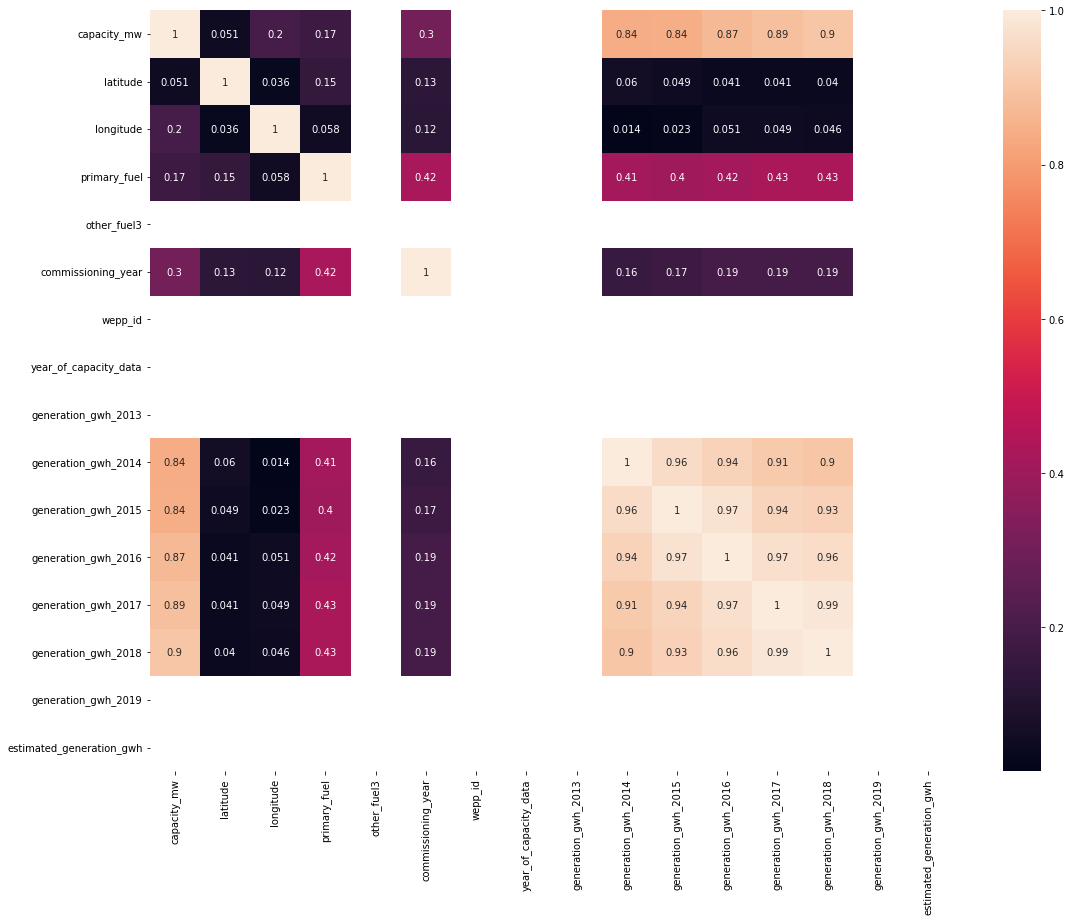

In [9]:
#plotting heatmap
df_corr=data.corr().abs() 
# this will get the coefficient of one variable vs all other variable relationship
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

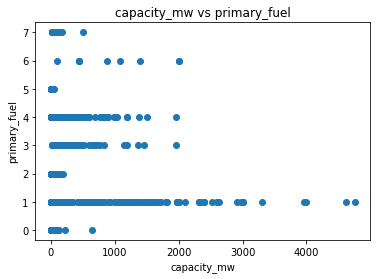

In [10]:
#seems like primary fuel and capacity are correalted as per above heat map. Now check with scatter plot
plt.scatter(data.capacity_mw,data.primary_fuel)
plt.xlabel("capacity_mw")
plt.ylabel("primary_fuel")
plt.title("capacity_mw vs primary_fuel")
plt.show()

In [20]:
#now train and test
x=data.drop(columns=['capacity_mw','primary_fuel'])
y=data['capacity_mw']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=35)

In [26]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n------Train Result-------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n------Test Result-------")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\n\n Test Classification Report\n", classification_report(y_test,pred,digits=2))
        

In [30]:
#model initiation
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'IND'